<a href="https://colab.research.google.com/github/juanmartinezitm/ML_notebooks/blob/master/LinearClassifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear classifier in sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np

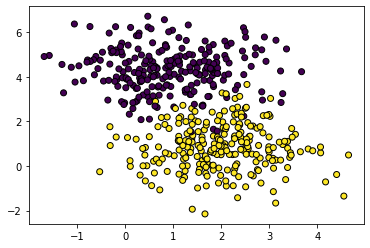

In [ ]:
#Create a set of samples 
X, y = make_blobs(n_samples=500, centers=2, n_features=2,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')

In [ ]:
clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3, alpha = 1))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=1, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
#predict test samples and compute a performance metric
yh = clf.predict(X_test)
acc = accuracy_score(y_test, yh)
print(acc)

0.96


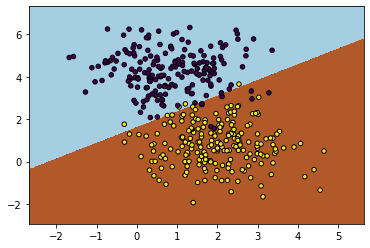

In [ ]:
#plot the decission boundary
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

X = np.array([xx.ravel(),yy.ravel()]).T
pred_ = clf.predict(X)

scaler = clf.named_steps['standardscaler']
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(xx, yy, pred_.reshape(xx.shape), cmap=plt.cm.Paired)
X_trainn = scaler.transform(X_train)
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)
